### 安装包

In [5]:
install.packages("GPArotation")

install.packages("corrplot")

Installing package into ‘/usr/lib64/R/library’
(as ‘lib’ is unspecified)
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Installing package into ‘/usr/lib64/R/library’
(as ‘lib’ is unspecified)
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


### 内存清理

In [3]:
rm(list = ls())  #清理内存,对象
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,562488,30.1,1166290,62.3,1166290,62.3
Vcells,1092925,8.4,8388608,64.0,3952364,30.2


### 因子分析函数
- 自带的factanal函数
  - factanal(x,factors,data=NULL,covmat=NUL,n.obs=NA,subset,na.action,start=NULL,
             score=c("none","regression","Bartlett"),
             rotation="varimax",control=NULL,…)
  - x：是公式或者用于因子分析的数据，可以是矩阵或数据框
  - factors：表示要生成的因子个数
  - data：指定数据集，当x为公式的时候使用
  - covmat：是样本的协方差矩阵或者相关系数矩阵，x可以忽略
  - scores：表示计算因子得分的方法，回归法（regression）、加权最小二乘法（Bartlett）
  - rotation表示因子旋转的方法，默认为"varimax"
  - 只支持极大似然估计因子分析
- psych包里的fa函数
  - fa(r, nfactors=, n.obs=, rotate=, scores=, fm=)
  - r：相关系数矩阵或原始数据矩阵
  - nfators：设定提取的因子数（默认1）
  - n.obs：观测数（输入相关系数矩阵时填写）
  - rotate：设定放置的方法（“varimax”，最大方差旋转正交法）
  - scores：表示计算因子得分（默认不计算）
  - fm：估计解的方法（主轴因子法（fa）、）

In [31]:
# ?factanal


factanal {stats},R Documentation
x,A formula or a numeric matrix or an object that can be coerced to a numeric matrix.
factors,The number of factors to be fitted.
data,"An optional data frame (or similar: see model.frame), used only if x is a formula. By default the variables are taken from environment(formula)."
covmat,"A covariance matrix, or a covariance list as returned by cov.wt. Of course, correlation matrices are covariance matrices."
n.obs,"The number of observations, used if covmat is a covariance matrix."
subset,"A specification of the cases to be used, if x is used as a matrix or formula."
na.action,The na.action to be used if x is used as a formula.
start,"NULL or a matrix of starting values, each column giving an initial set of uniquenesses."
scores,"Type of scores to produce, if any. The default is none, ""regression"" gives Thompson's scores, ""Bartlett"" given Bartlett's weighted least-squares scores. Partial matching allows these names to be abbreviated."
rotation,"character. ""none"" or the name of a function to be used to rotate the factors: it will be called with first argument the loadings matrix, and should return a list with component loadings giving the rotated loadings, or just the rotated loadings."


corrplot 0.84 loaded


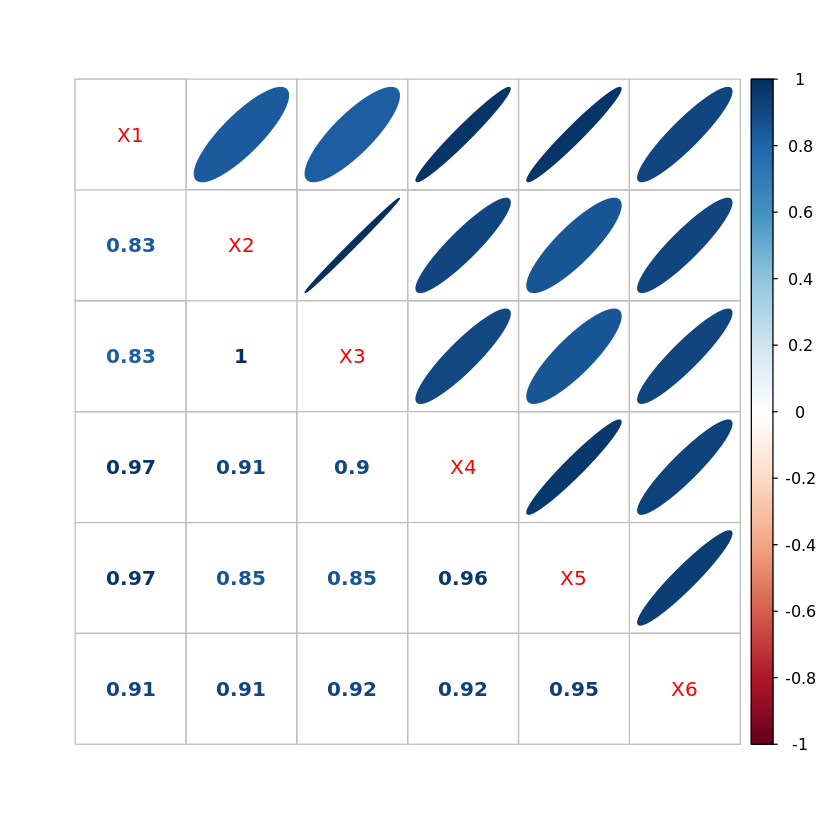

In [6]:
EcoData <- read.table(file = "EcoData.txt", header = TRUE)
RMatrix <- cor(EcoData)

### 协方差阵

In [8]:
cor(EcoData)  

,X1,X2,X3,X4,X5,X6
X1,1.0000000,0.8335205,0.8273228,0.9727785,0.9709226,0.9145442
X2,0.8335205,1.0000000,0.9963068,0.9130362,0.8531449,0.9105502
X3,0.8273228,0.9963068,1.0000000,0.9042050,0.8532975,0.9199512
X4,0.9727785,0.9130362,0.9042050,1.0000000,0.9615950,0.9219633
X5,0.9709226,0.8531449,0.8532975,0.9615950,1.0000000,0.9452633
X6,0.9145442,0.9105502,0.9199512,0.9219633,0.9452633,1.0000000


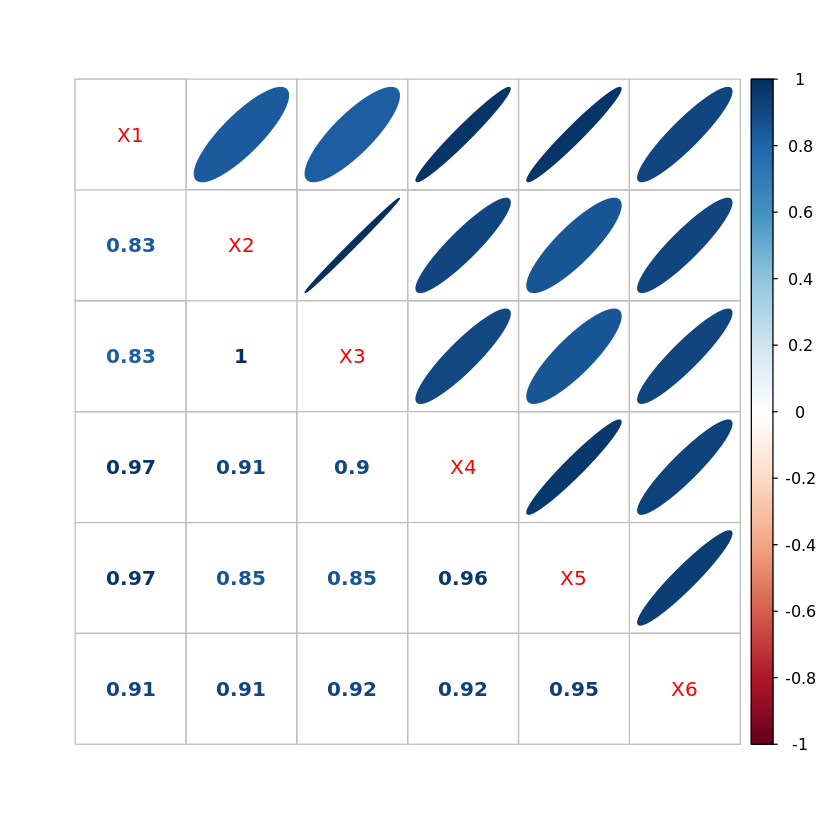

In [9]:
library(corrplot)
corrplot.mixed(RMatrix, upper = "ellipse")

### 计算特征值&特征向量

In [10]:
Result <- eigen(RMatrix)

-0.4049083,0.486289824
-0.4036845,-0.529621560
-0.4032796,-0.544261090
-0.4161612,0.179877725
-0.4096733,0.392995458
-0.4116204,0.001284532


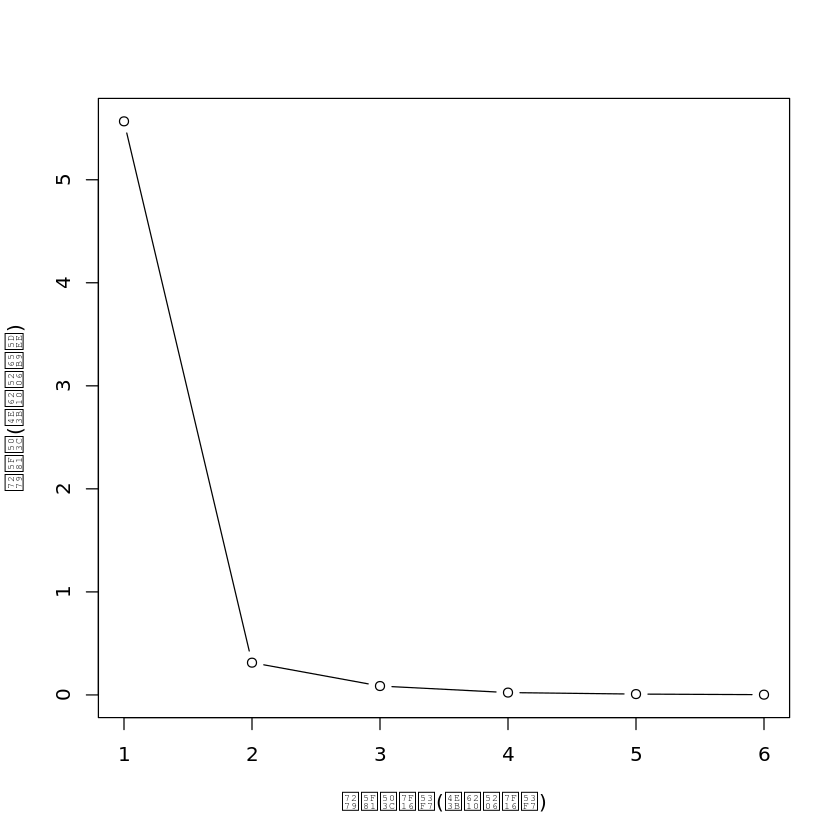

In [11]:
plot(Result$values, type = "b", 
     ylab = "特征值(主成分方差)", 
     xlab = "特征值编号(主成分编号)")
(U <- as.matrix(Result$vectors[, 1:2]))

### 计算主成分得分
- 计算主成分 as.matrix
- 标准化 Scala
- 绘制散点图

3.20662895,-0.7346375
3.01112570,-0.5906686
2.88525326,-0.5044852
2.64445890,-0.3671235
2.31774482,-0.2749924
1.93222223,-0.1066580
1.42870922,0.1532427
1.17679464,0.2818225
0.64091589,0.4138109
0.33931809,0.6175944
0.07935902,0.8223131


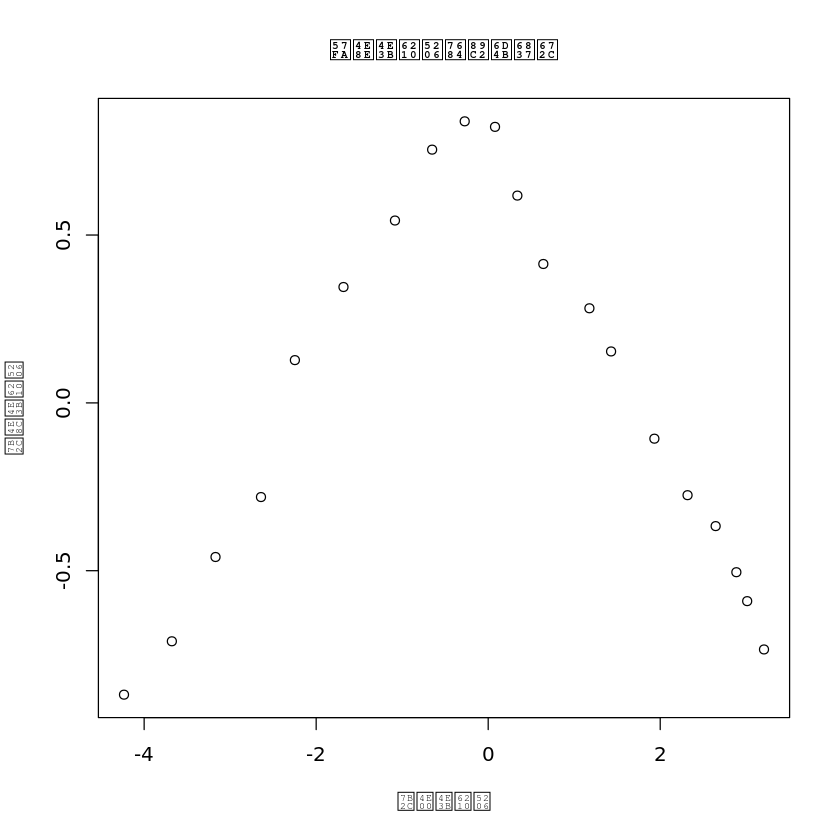

In [13]:
Y <- as.matrix(scale(EcoData)) %*% U
Y
plot(Y, xlab="第一主成分", ylab="第二主成分", 
     main="基于主成分的观测样本")

In [14]:
EcoData <- read.table(file = "EcoData.txt", header = TRUE)
pca <- princomp(x = EcoData, cor = TRUE)
pca$loadings #loadings的成分中存储着主成分系数矩阵
pca$scores[, 1:2] #存储着各主成分上的得分


Loadings:
   Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6
X1  0.405  0.486  0.239  0.513  0.528       
X2  0.404 -0.530  0.202         0.132 -0.705
X3  0.403 -0.544                0.224  0.697
X4  0.416  0.180  0.496        -0.732  0.107
X5  0.410  0.393 -0.191 -0.782  0.170       
X6  0.412        -0.786  0.347 -0.297       

               Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6
SS loadings     1.000  1.000  1.000  1.000  1.000  1.000
Proportion Var  0.167  0.167  0.167  0.167  0.167  0.167
Cumulative Var  0.167  0.333  0.500  0.667  0.833  1.000

Comp.1,Comp.2
-3.28993189,-0.7537222
-3.08934978,-0.6060131
-2.96020739,-0.5175909
-2.71315758,-0.3766607
-2.37795601,-0.2821362
-1.98241818,-0.1094288
-1.46582473,0.1572236
-1.20736583,0.2891438
-0.65756583,0.4245610
-0.34813302,0.6336385


In [15]:
EcoData <- read.table(file = "EcoData.txt", header = TRUE)
RMatrix <- cor(EcoData)
Result <- eigen(RMatrix)

lambda <- Result$values 
vectors <- Result$vectors

A <- NULL
for(i in 1:6){
  f <- sqrt(Result$values[i]) * Result$vectors[, i]
  A <- cbind(A, f)
}
colnames(A) <- paste("f", 1:6, sep = "")
A

f1,f2,f3,f4,f5,f6
-0.9553487,0.2721288792,-0.07031026,0.077497752,0.04801341,0.0001207217
-0.9524612,-0.2963774161,-0.05937753,-0.006504199,0.01196010,-0.0355949009
-0.9515059,-0.3045697296,-0.01216058,-0.008413385,0.02036565,0.0352193051
-0.9818989,0.1006599793,-0.14585262,0.003475880,-0.06653986,0.0054250430
-0.9665914,0.2199211419,0.05614329,-0.118074493,0.01545534,-0.0018155948
-0.9711853,0.0007188271,0.23089454,0.052389413,-0.02702131,-0.0033936368


In [16]:
Result$values
(cR <- cumsum(Result$values) / sum(Result$values))

[1] 5.566862247 0.313154677 0.086354449 0.022817309 0.008259662 0.002551655

[1] 0.9278104 0.9800028 0.9943952 0.9981981 0.9995747 1.0000000

f1,f2
-0.9553487,0.2721288792
-0.9524612,-0.2963774161
-0.9515059,-0.3045697296
-0.9818989,0.1006599793
-0.9665914,0.2199211419
-0.9711853,0.0007188271


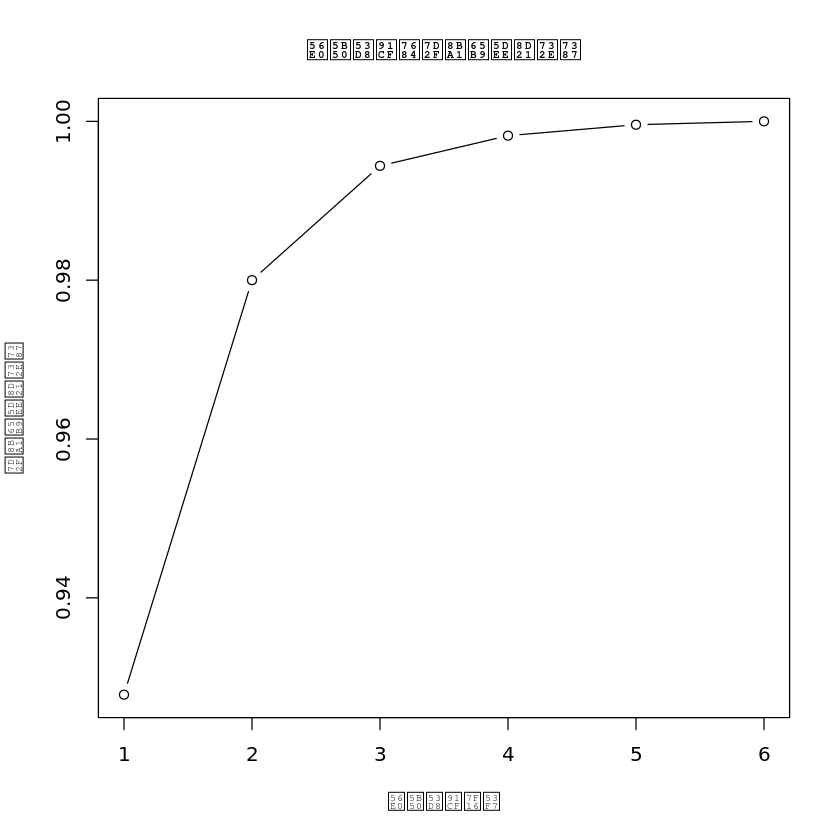

In [17]:
plot(cR, type = "b", 
     xlab = "因子变量编号",
     ylab = "累计方差贡献率",
     main = "因子变量的累计方差贡献率")
A[, 1:2] #取两个因子变量的因子载荷矩阵

In [18]:
h2 <- vector(length = 6)
for(i in 1:6){ 
  h2[i] = round(sum(A[i, 1:2] ^ 2), 2)
}
cbind(A[, 1:2], h2)

f1,f2,h2
-0.9553487,0.2721288792,0.99
-0.9524612,-0.2963774161,1.00
-0.9515059,-0.3045697296,1.00
-0.9818989,0.1006599793,0.97
-0.9665914,0.2199211419,0.98
-0.9711853,0.0007188271,0.94


In [24]:
library("psych")
EcoData <- read.table(file = "EcoData.txt", header = TRUE)
RMatrix <- cor(EcoData)
(pc <- principal(r = RMatrix, nfactors = 2, rotate = "none"))
pc

Principal Components Analysis
Call: principal(r = RMatrix, nfactors = 2, rotate = "none")
Standardized loadings (pattern matrix) based upon correlation matrix
    PC1   PC2   h2     u2 com
X1 0.96 -0.27 0.99 0.0133 1.2
X2 0.95  0.30 1.00 0.0050 1.2
X3 0.95  0.30 1.00 0.0019 1.2
X4 0.98 -0.10 0.97 0.0257 1.0
X5 0.97 -0.22 0.98 0.0173 1.1
X6 0.97  0.00 0.94 0.0568 1.0

                       PC1  PC2
SS loadings           5.57 0.31
Proportion Var        0.93 0.05
Cumulative Var        0.93 0.98
Proportion Explained  0.95 0.05
Cumulative Proportion 0.95 1.00

Mean item complexity =  1.1
Test of the hypothesis that 2 components are sufficient.

The root mean square of the residuals (RMSR) is  0.01 

Fit based upon off diagonal values = 1

Principal Components Analysis
Call: principal(r = RMatrix, nfactors = 2, rotate = "none")
Standardized loadings (pattern matrix) based upon correlation matrix
    PC1   PC2   h2     u2 com
X1 0.96 -0.27 0.99 0.0133 1.2
X2 0.95  0.30 1.00 0.0050 1.2
X3 0.95  0.30 1.00 0.0019 1.2
X4 0.98 -0.10 0.97 0.0257 1.0
X5 0.97 -0.22 0.98 0.0173 1.1
X6 0.97  0.00 0.94 0.0568 1.0

                       PC1  PC2
SS loadings           5.57 0.31
Proportion Var        0.93 0.05
Cumulative Var        0.93 0.98
Proportion Explained  0.95 0.05
Cumulative Proportion 0.95 1.00

Mean item complexity =  1.1
Test of the hypothesis that 2 components are sufficient.

The root mean square of the residuals (RMSR) is  0.01 

Fit based upon off diagonal values = 1

In [20]:
fa <- fa(r = RMatrix, nfactors = 2, fm = "pa", rotate = "none")

Warning message in fac(r = r, nfactors = nfactors, n.obs = n.obs, rotate = rotate, :
“An ultra-Heywood case was detected.  Examine the results carefully”

Warning message in fa.stats(r = r, f = f, phi = phi, n.obs = n.obs, np.obs = np.obs, :
“The estimated weights for the factor scores are probably incorrect.  Try a different factor extraction method.”

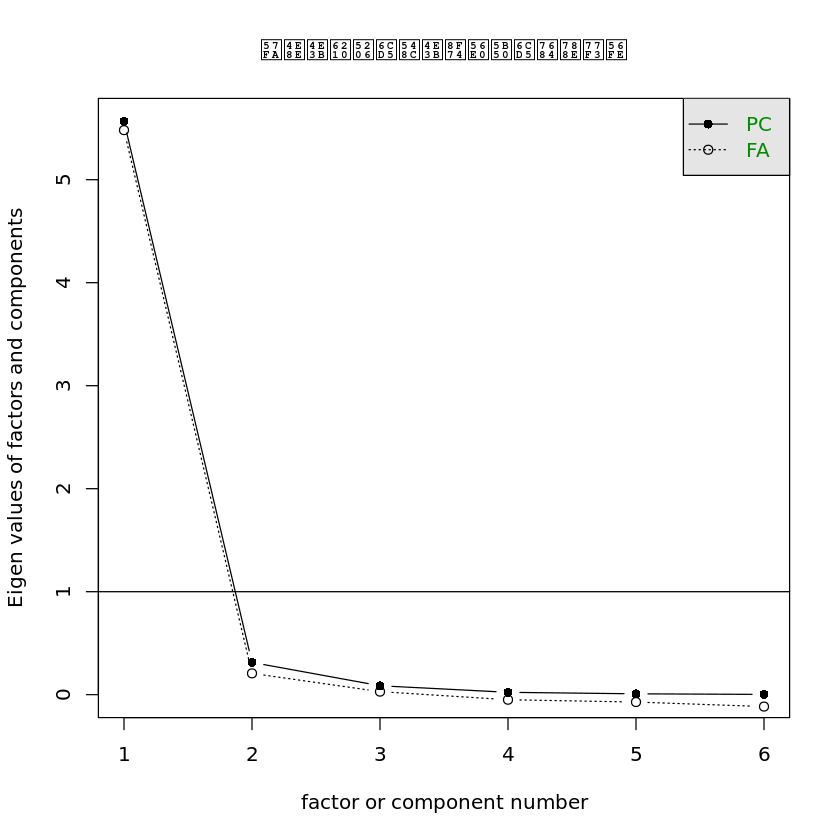

In [21]:
scree(rx = RMatrix, factors = TRUE, pc = TRUE, 
      main = "基于主成分法和主轴因子法的碎石图")

Warning message in fac(r = r, nfactors = nfactors, n.obs = n.obs, rotate = rotate, :
“An ultra-Heywood case was detected.  Examine the results carefully”

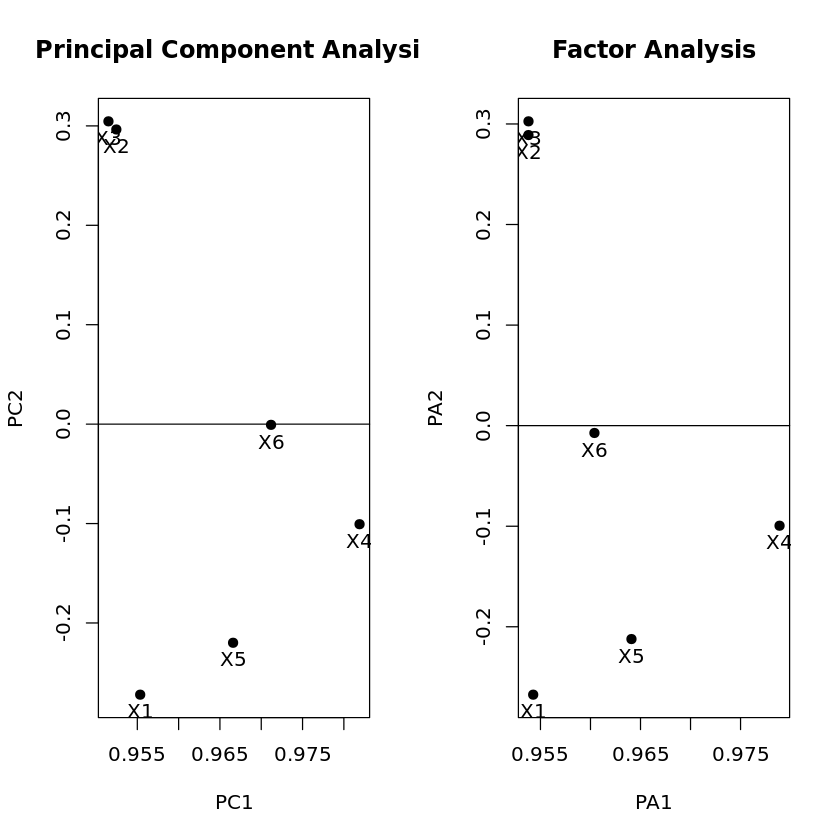

In [22]:
EcoData <- read.table(file = "EcoData.txt", header = TRUE)
RMatrix <- cor(EcoData)
library("psych")
pc <- principal(RMatrix, nfactors = 2, rotate = "none")
fa <- fa(RMatrix, nfactors = 2, fm = "pa", rotate = "none")
par(mfrow = c(1, 2))
factor.plot(pc, label = rownames(pc$loadings))
factor.plot(fa, label = rownames(fa$loadings))

In [23]:
varimax(x = pc$loadings)
varimax(x = fa$loadings)

$loadings

Loadings:
   PC1   PC2  
X1 0.882 0.457
X2 0.490 0.869
X3 0.484 0.874
X4 0.784 0.600
X5 0.854 0.503
X6 0.707 0.665

                 PC1   PC2
SS loadings    3.096 2.784
Proportion Var 0.516 0.464
Cumulative Var 0.516 0.980

$rotmat
           [,1]      [,2]
[1,]  0.7278591 0.6857267
[2,] -0.6857267 0.7278591


$loadings

Loadings:
   PA1   PA2  
X1 0.878 0.459
X2 0.496 0.864
X3 0.487 0.874
X4 0.781 0.599
X5 0.847 0.506
X6 0.704 0.653

                 PA1   PA2
SS loadings    3.079 2.763
Proportion Var 0.513 0.460
Cumulative Var 0.513 0.974

$rotmat
           [,1]      [,2]
[1,]  0.7281238 0.6854456
[2,] -0.6854456 0.7281238


Principal Components Analysis
Call: principal(r = RMatrix, nfactors = 2, rotate = "varimax")
Standardized loadings (pattern matrix) based upon correlation matrix
    RC1  RC2   h2     u2 com
X1 0.88 0.46 0.99 0.0133 1.5
X2 0.49 0.87 1.00 0.0050 1.6
X3 0.48 0.87 1.00 0.0019 1.6
X4 0.78 0.60 0.97 0.0257 1.9
X5 0.85 0.50 0.98 0.0173 1.6
X6 0.71 0.67 0.94 0.0568 2.0

                       RC1  RC2
SS loadings           3.10 2.78
Proportion Var        0.52 0.46
Cumulative Var        0.52 0.98
Proportion Explained  0.53 0.47
Cumulative Proportion 0.53 1.00

Mean item complexity =  1.7
Test of the hypothesis that 2 components are sufficient.

The root mean square of the residuals (RMSR) is  0.01 

Fit based upon off diagonal values = 1

Warning message in fac(r = r, nfactors = nfactors, n.obs = n.obs, rotate = rotate, :
“An ultra-Heywood case was detected.  Examine the results carefully”

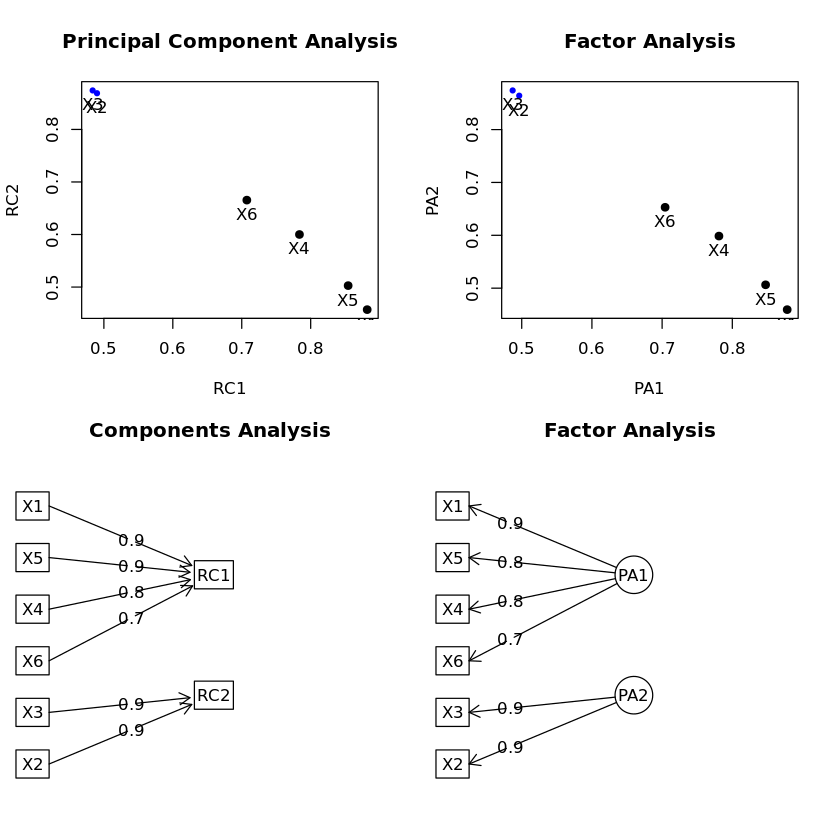

In [25]:
library("GPArotation")
(pc <- principal(RMatrix, nfactors = 2, rotate = "varimax"))
library("MASS")
fa <- fa(RMatrix, nfactors = 2, fm = "pa", rotate = "varimax")
par(mfrow = c(2, 2))
factor.plot(pc, label = rownames(pc$loadings))
factor.plot(fa, label = rownames(fa$loadings))
fa.diagram(pc, simple = TRUE) #绘制因子结果图
fa.diagram(fa, simple = TRUE)

,RC1,RC2
X1,0.7208014,-0.5148237
X2,-0.5244560,0.8061883
X3,-0.5425199,0.8251119
X4,0.3488008,-0.1130115
X5,0.6079501,-0.3920934
X6,0.1285551,0.1179600


Warning message in fac(r = r, nfactors = nfactors, n.obs = n.obs, rotate = rotate, :
“An ultra-Heywood case was detected.  Examine the results carefully”

,PA1,PA2
X1,0.83964488,-0.2280546
X2,0.07375969,-0.1307974
X3,-1.04133029,2.0397698
X4,0.15612472,-0.4422410
X5,0.58093682,-0.1366989
X6,0.13411299,-0.3588773


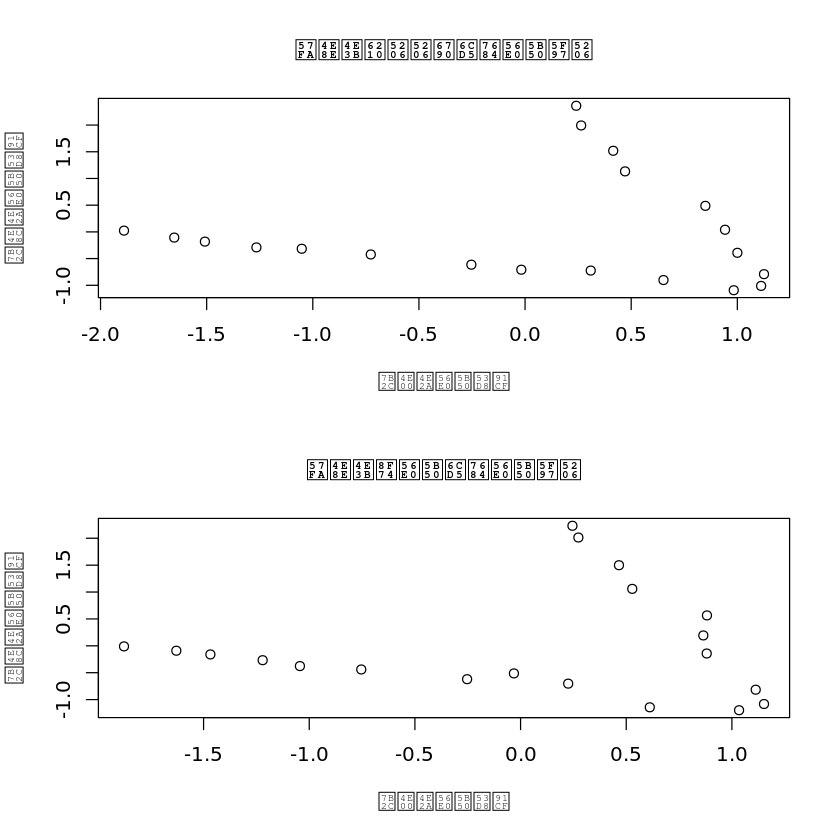

In [27]:
pc <- principal(RMatrix, nfactors = 2, rotate = "varimax",
                scores = TRUE, method = "regression")
pc$weight
fa <- fa(RMatrix, nfactors = 2, fm = "pa",
         rotate = "varimax", scores = "regression")
fa$weight

pcFS <- as.matrix(scale(EcoData)) %*% pc$weight
faFS <- as.matrix(scale(EcoData)) %*% fa$weight
par(mfrow = c(2, 1))
plot(pcFS, main = "基于主成分分析法的因子得分",
     xlab = "第一个因子变量", ylab = "第二个因子变量")
plot(faFS, main = "基于主轴因子法的因子得分",
     xlab = "第一个因子变量", ylab = "第二个因子变量")

In [30]:
library(psych)
EcoData <- read.csv(file = "fiance.csv", header = TRUE, fileEncoding="GB 2312")
EcoData <- EcoData[, -13]
RMatrix <- cor(EcoData[, c(3:12)])
pc <- principal(RMatrix, nfactors = 3, rotate = "none")
pc

Principal Components Analysis
Call: principal(r = RMatrix, nfactors = 3, rotate = "none")
Standardized loadings (pattern matrix) based upon correlation matrix
     PC1   PC2   PC3   h2    u2 com
x1  0.66 -0.47  0.12 0.67 0.328 1.9
x2  0.83 -0.35  0.10 0.83 0.174 1.4
x3  0.89  0.00 -0.04 0.79 0.214 1.0
x4  0.89  0.04 -0.08 0.80 0.204 1.0
x5  0.67  0.69  0.11 0.93 0.066 2.0
x6  0.39  0.37  0.81 0.95 0.049 1.9
x7  0.53  0.67 -0.33 0.83 0.168 2.4
x8  0.58  0.70 -0.26 0.90 0.101 2.2
x9  0.75 -0.56  0.02 0.88 0.123 1.9
x10 0.64 -0.60 -0.22 0.81 0.192 2.2

                       PC1  PC2  PC3
SS loadings           4.88 2.57 0.93
Proportion Var        0.49 0.26 0.09
Cumulative Var        0.49 0.75 0.84
Proportion Explained  0.58 0.31 0.11
Cumulative Proportion 0.58 0.89 1.00

Mean item complexity =  1.8
Test of the hypothesis that 3 components are sufficient.

The root mean square of the residuals (RMSR) is  0.07 

Fit based upon off diagonal values = 0.98

In [ ]:
(350-219.99-131.67)**2